<h1 style="text-align: center;"><strong>Machine Learning Project Final Report</strong></h1>
<h2 style="text-align: center;"><strong>TensorFlow Speech Recognition Challenge</strong></h2>
<h3 style="text-align: center;"><strong>Mustafa Salih Oğuz | 213012263</strong></h3>
<h3><strong>1. Project Summary</strong></h3>
<p>In this project I try to recognize words from short audio files. This is a Kaggle Competition opened by Google Brain. Aim of the competition is to be able to recognize 10 labeled words, silence and unknown words as accurate as possible from thousands of various one second audio files.</p>

<p>The way I tried to achieve this by converting .wav auido files into spectrograms and mfc's and then feeding them into machine learning algorithms.</p>

<p>I was able to convert .wav audio files into graphs. However, to download spectrogram graphs I needed to plot graphs for all of my training and test set which makes up to 210.000 graphs. My 8 GB RAM was not enough for matplotlib to plot 60.000 traing set graphs, it gave memory error repetatly. So, I had to change my plan. Instead of plotting the graphs I decided to go with matrix representation of the graphs.</p>

<p>I used a small amount of my training data to split and create training and test sets. I fed various ML algorithms with that training set but it took too much time and I got a 0.03 accuracy on the small test set with 5 labels. The reason for that was my label matrix. For doing multi-class classification I made a multidimensional y matrix. That gave very poor result.</p>

<p>Then I fixed that and prepared a proper one-dimensional y matrix that has numbers from 0 to 11 for every class. That increased the accuracy by tenfold however 0.3 accuracy was not acceptable.</p>

<p>After that I started to work on the whole training set by splitting it into training and test set with a 0.2 ratio. I used PCA to reduce dimensions of training data. It made the process much faster and doubled my accuracy to 0.62. The problem with that was very different algorithms and different matrix representations gave exactly the same accuracy, it was a little suspicious because 17 digits after 0 were same. I had to check other metrics. When I checked precision, recall, and f1 scores, they were approximately 0.1 and confusion matrix showed that actually, my accuracy was too low that almost all of the test set classified as "unknown". Since 62% of my test set has the label "unknown", I got a 0.62 accuracy from all the classifiers. Actually, my prediction was too bad.</p>

<p>I had to solve this problem of unbalanced data to get a better result. I used oversampling to make my data more balanced. Indeed, my accuracy hit 0.96 and precision score to 0.9 after oversampling. Afterwards, I decided to work with real test set and see the accuracy on Kaggle. I expected a good result because I had 0.96 accuracy with training set but that was not the case. I got 0.1 accuracy on Kaggle, still, I passed 300 people though. I realized I overfitted my algorithms, especially random forest and extra trees performed this way. I configured my algorithms, scaled the data set further and tried to make a prediction with a less overfitted algorithm Gradient Boosting. It only increased my accuracy to 1.8. I plotted cross validation graph and saw that it actually can be increased to 0.65. I tried to implement early stopping but it took forever because of my computer's relatively weak computational power, so I didn't get the results.</p>

<p>In the end, I worked on this project for tens of hours and got a mediocre result. That made me finalize the project here. Therefore, I just briefly tried to implement a neural network but didn't go further and stopped there. Nevertheless, I learned many concepts and practiced machine learning for days. That is why I feels like I greatly benefited from this project.</p>

<h3><strong>2. Load Libraries</strong></h3>

In [23]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
import IPython.display as ipd
from scipy import signal
import librosa
import librosa.display
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import math

<h3><strong>3. Preparing Training Data Matrices</strong></h3>

In [2]:
def make_mfc(example_rate, example):
    """returns mfc matrix representation of the wav file"""
    S = librosa.feature.melspectrogram(example, sr=example_rate, n_mels=128)
    return librosa.power_to_db(S, ref=np.max)

In [3]:
def make_spectrogram(example_rate, example):
    """returns spectrogram matrix representation of the wav file"""
    freqs, times, spec = signal.spectrogram(example, fs=example_rate)
    return np.log(spec.T.astype(np.float32)+0.00000000001)

In [4]:
# Filling matrix lists with training dataset
t = time.time()
path_start = os.getcwd()+"\\train\\audio"
waveform_matrix = []
mfc_matrix = []
spectrogram_matrix = []
labels = []
categories = {"yes":0, "no":1, "up":2, "down":3, "left":4, "right":5, "on":6, "off":7, "stop":8, "go":9, "unknown":10, "silence":11}

pca = PCA(n_components=1)

for i in os.listdir(os.getcwd()+"/train/audio"):
    print(i)
    for j in os.listdir(os.getcwd()+"/train/audio/"+i):
        try:       
            path = path_start  + "\\" + i + "\\" + j
            example_rate, example = wavfile.read(path)
            if i == "_background_noise_": # breaking down long noise audio files to 1 second
                for p in range(math.floor(example.shape[0]/example_rate)):
                    if (example_rate*(p+2) > example.shape[0]):
                        break
                    pca = PCA(n_components=1)
                    ex = example[example_rate*(p+1):example_rate*(p+2)]
                    mfc_matrix.append(pca.fit_transform(make_mfc(example_rate, ex))[:128])
                    spectrogram_matrix.append(pca.fit_transform(make_spectrogram(example_rate, ex))[:71])
                    labels.append(categories["silence"])
            else:
                waveform_matrix.append(example[:16000])
                mfc_matrix.append(pca.fit_transform(make_mfc(example_rate, example))[:128])
                spectrogram_matrix.append(pca.fit_transform(make_spectrogram(example_rate, example))[:71])

                if i in categories.keys():
                    labels.append(categories[i])
                else:
                    labels.append(categories["unknown"])
        except:
            print("!!!ERROR!!! " + i + "\\" + j)
print(time.time() - t)

bed
bird


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:425: RuntimeWarning:

invalid value encountered in true_divide



cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero
_background_noise_


C:\Users\musta\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning:

Chunk (non-data) not understood, skipping it.



1008.774069070816


In [76]:
joblib.dump([waveform_matrix, mfc_matrix, spectrogram_matrix, labels], 'all_training_data.pkl', protocol = 2 )

['all_training_data.pkl']

In [3]:
waveform_matrix, mfc_matrix, spectrogram_matrix, labels = joblib.load("all_training_data.pkl")

<h3><strong>4. Classification on Training Data</strong></h3>

In [18]:
def PrepareSets(df_local):
    """splits given dataframe into test and training sets and returns them"""
    X = df_local[:, :]

    y = np.array(labels)
    ros = RandomOverSampler(random_state=0)
    X, y = ros.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    pca = PCA(n_components=1)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    return X_train, X_test, y_train, y_test

In [30]:
def TrainCLF(X_train, X_test, y_train, y_test):
    """makes predicitons with given training and test set on various classifiers.
    returns accuracy, recall, precision, f1 scores and confusion matrix for all classifiers used."""
    # Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=0)
    rf_clf.fit(X_train, y_train)
    
    # Extra Trees Classifier
    et_clf = ExtraTreesClassifier(random_state=0)
    et_clf.fit(X_train, y_train)

    # Gradient Boosting Classifier
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    gb_clf.fit(X_train, y_train)

    # AdaBoost Classifier
    ab_clf = AdaBoostClassifier(n_estimators=100)
    ab_clf.fit(X_train, y_train)

    # -------------------------

    # Random Forest Classifier
    rf_clf1 = RandomForestClassifier(random_state=0)

    # Extra Trees Classifier
    et_clf1 = ExtraTreesClassifier(random_state=0)

    # Gradient Boosting Classifier
    gb_clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

    # AdaBoost Classifier
    ab_clf1 = AdaBoostClassifier(n_estimators=100)

    # Soft Ensemble Classifier
    voting_clf = VotingClassifier(estimators=[('rf', rf_clf1), ('et', et_clf1)], voting='soft')
    voting_clf.fit(X_train, y_train)

    # Soft Ensemble Classifier 2
    voting_clf2 = VotingClassifier(estimators=[('rf', rf_clf1), ('et', et_clf1), ('gb', gb_clf1), ('ab', ab_clf1)], voting='soft')
    voting_clf2.fit(X_train, y_train)

    # Hard Ensemble Classifier
    voting_clf3 = VotingClassifier(estimators=[('rf', rf_clf1), ('et', et_clf1)], voting='hard')
    voting_clf3.fit(X_train, y_train)

    # -------------------------
    
    # Linear SVC
    lsvc_clf = LinearSVC(random_state=0)
    lsvc_clf.fit(X_train, y_train)

    # Stochastic Gradient Descent Classifier
    sgd_clf = SGDClassifier(max_iter = 1000)
    sgd_clf.fit(X_train, y_train)
    
    # --------------------------
    
    results = {}
    for clf in (rf_clf, et_clf, gb_clf, ab_clf, voting_clf, voting_clf2, voting_clf3):
        y_pred = clf.predict(X_test)
        results.setdefault(clf.__class__.__name__, {"accuracy_score":[], "confusion_matrix":[], "recall_score":[], "precision_score":[], "f1_score":[]})
        results[clf.__class__.__name__]["accuracy_score"].append(accuracy_score(y_test, y_pred))
        results[clf.__class__.__name__]["confusion_matrix"].append(confusion_matrix(y_test, y_pred))
        results[clf.__class__.__name__]["recall_score"].append(recall_score(y_test, y_pred, average='macro'))
        results[clf.__class__.__name__]["precision_score"].append(precision_score(y_test, y_pred, average='macro'))
        results[clf.__class__.__name__]["f1_score"].append(f1_score(y_test, y_pred, average='macro'))
        
    for clf in (lsvc_clf, sgd_clf):
        y_pred = clf.predict(X_test)        
        results.setdefault(clf.__class__.__name__, {"accuracy_score":[], "confusion_matrix":[], "recall_score":[], "precision_score":[], "f1_score":[]})
        results[clf.__class__.__name__]["accuracy_score"].append(clf.score(X_test, y_test))
        results[clf.__class__.__name__]["confusion_matrix"].append(confusion_matrix(y_test, y_pred))
        results[clf.__class__.__name__]["recall_score"].append(recall_score(y_test, y_pred, average='macro'))
        results[clf.__class__.__name__]["precision_score"].append(precision_score(y_test, y_pred, average='macro'))
        results[clf.__class__.__name__]["f1_score"].append(f1_score(y_test, y_pred, average='macro'))
        
    return results

In [28]:
def ShowResult(matrix):
    """takes matrix representation of the data, preprocesses it and returns results"""
    df1 = pd.DataFrame(matrix)
    df1 = df1.fillna(df1.mean())

    scaler = StandardScaler()
    df1 = scaler.fit_transform(df1)

    X_train, X_test, y_train, y_test = PrepareSets(df1)
   
    return TrainCLF(X_train, X_test, y_train, y_test)

<h3>Testing Using MFC Matrix</h3>
<p>Result: Soft Voting Classifier Gave 0.96270 accuracy</p>

In [32]:
# MFC Matrix Data Preprocessing & Prediction
new_mfc_matrix = np.array(mfc_matrix)
nsamples, nx, ny = new_mfc_matrix.shape
new_mfc_matrix = new_mfc_matrix.reshape((nsamples,nx*ny))
pca = PCA(n_components=1)
new_mfc_matrix = pca.fit_transform(new_mfc_matrix)

final_results = ShowResult(new_mfc_matrix)
print(final_results)

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



{'RandomForestClassifier': {'accuracy_score': [0.95848478079883037], 'confusion_matrix': [array([[8211,    4,    4,    0,    0,    3,    1,    0,    1,    0,    0,
           0],
       [   0, 8186,    0,    0,    0,    6,    2,    0,    0,    0,    0,
           0],
       [   0,    4, 8160,    7,    0,    0,    0,    3,    3,    0,    0,
           0],
       [   0,    0,    4, 8177,    3,    3,    0,    0,    0,    5,    0,
           0],
       [   5,    0,    7,    0, 8286,    0,    0,    0,    3,    0,    0,
           0],
       [   0,    0,    0,    0,    9, 8165,    0,    0,    0,    0,    0,
           0],
       [   4,    0,    0,    4,    0,    0, 8191,    3,    7,    0,    0,
           2],
       [   0,    0,   21,    0,    2,    0,    0, 8202,    0,    4,    0,
           0],
       [   3,    0,    2,    0,    0,    4,    0,    0, 8146,    3,    0,
           0],
       [   0,   12,    0,    0,    0,    0,    0,    3,    0, 8231,    0,
           0],
       [ 431,  366, 

In [46]:
print("accuracy_scores")
for i in final_results:
    print("\n"+i)
    print(final_results[i]["accuracy_score"])

accuracy_scores

RandomForestClassifier
[0.95848478079883037]

ExtraTreesClassifier
[0.96210936706804473]

GradientBoostingClassifier
[0.21572887688590167]

AdaBoostClassifier
[0.19801206164842527]

VotingClassifier
[0.96246471866306582, 0.96270838832822303, 0.95591609641196418]

LinearSVC
[0.10902186935244787]

SGDClassifier
[0.093762056571973923]


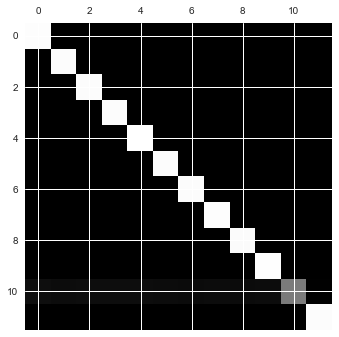

In [50]:
# Plotting confusion matrix
plt.matshow(final_results["VotingClassifier"]["confusion_matrix"][2], cmap=plt.cm.gray)
plt.show()

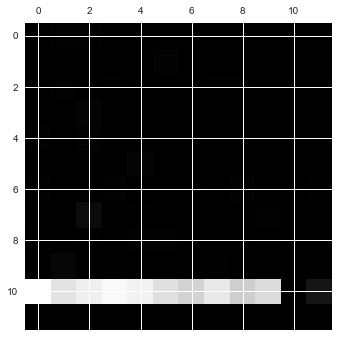

In [51]:
# Errors the classifier makes
row_sums = final_results["VotingClassifier"]["confusion_matrix"][2].sum(axis=1, keepdims=True)
norm_conf_mx = final_results["VotingClassifier"]["confusion_matrix"][2] / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

<h3>Testing using Waveform Matrix</h3>
<p>Result: Memory was not enough</p>

In [70]:
# Waveform Matrix Prediction
print(ShowResult(waveform_matrix))

MemoryError: 

<h3>Testing using Spectrogram Matrix</h3>
<p>Result: Soft Voting Classifier Gave 0.96354 accuracy</p>

In [69]:
# Preproccess Spectrogram Matrix
new_spectrgoram_matrix = []
for i in range(len(spectrogram_matrix)):
    new = []
    for j in spectrogram_matrix[i]:
        new.append(j[0])
    if len(new) < 71:
        mean = np.mean(new)
        for j in range(71 - len(new)):
            new.append(mean)
    new_spectrgoram_matrix.append(new)
new_spectrgoram_matrix = np.array(new_spectrgoram_matrix)

print(ShowResult(new_spectrgoram_matrix))

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



{'RandomForestClassifier': {'accuracy_score': [0.9589721201291449], 'confusion_matrix': [array([[8224,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   4, 8187,    0,    3,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0, 8173,    4,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0, 8192,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0, 8301,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0, 8174,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0, 8211,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    1,    0,    0,    0, 8228,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 8158,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 8246,    0,
           0],
       [ 357,  448,  

Observing Oversampling Results

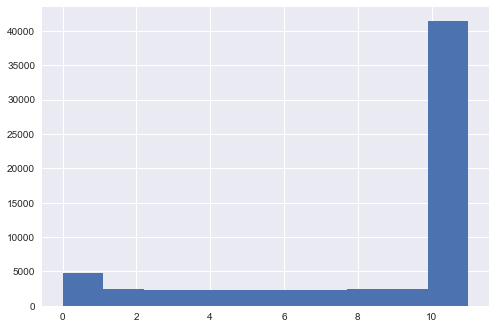

In [57]:
# Labels before oversampling
plt.hist(labels)
plt.show()

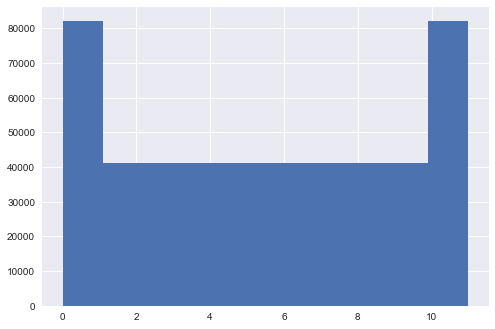

In [65]:
# Labels after oversampling
df2 = pd.DataFrame(new_mfc_matrix)
df2 = df2.fillna(df2.mean())

scaler = StandardScaler()
df2 = scaler.fit_transform(df2)
X1 = df2[:, :]
y1 = np.array(labels)
ros = RandomOverSampler(random_state=0)
X_resampled1, y_resampled1 = ros.fit_sample(X1, y1)

plt.hist(y_resampled1)
plt.show()

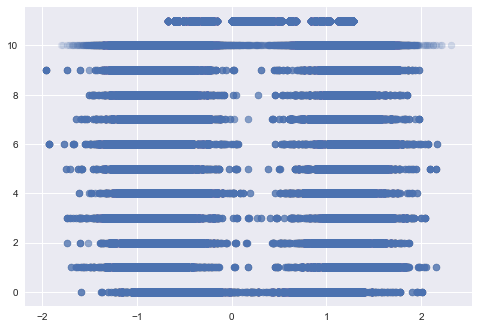

In [67]:
# Distribition of data ordered according to their labels
plt.scatter(X_resampled1, y_resampled1, alpha = 0.03)
plt.show()

<h3><strong>5. Classification on Testing Data</strong></h3>

In [74]:
# Filling matrix lists with testing dataset
waveform_matrix_test = []
spectrogram_matrix_test = []
mfc_matrix_test = []
file_name = []
index = 0
for i in os.listdir(os.getcwd()+"/test/audio"):
    if index % 5000 == 0:
        print(index)
    index+=1
    try:
        example_rate, example = wavfile.read(os.getcwd()+"\\test\\audio\\"+i)
        waveform_matrix_test.append(example[:16000])
        mfc_matrix_test.append(pca.fit_transform(make_mfc(example_rate, example))[:128])
        spectrogram_matrix_test.append(pca.fit_transform(make_spectrogram(example_rate, example))[:71])
        file_name.append(i)
    except:
        print("Error in "+ os.getcwd()+"/test/audio"+i)

0


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:425: RuntimeWarning:

invalid value encountered in true_divide



5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000


In [75]:
joblib.dump([waveform_matrix_test, mfc_matrix_test, spectrogram_matrix_test, file_name], 'all_testing_data.pkl', protocol = 2)

['all_testing_data.pkl']

In [4]:
waveform_matrix_test, mfc_matrix_test, spectrogram_matrix_test, file_name = joblib.load('all_testing_data.pkl')

In [ ]:
# Preprocess training data
new_spectrgoram_matrix = []
for i in range(len(spectrogram_matrix)):
    new = []
    for j in spectrogram_matrix[i]:
        new.append(j[0])
    if len(new) < 71:
        mean = np.mean(new)
        for j in range(71 - len(new)):
            new.append(mean)
    new_spectrgoram_matrix.append(new)
new_spectrgoram_matrix = np.array(new_spectrgoram_matrix)

df1 = pd.DataFrame(new_spectrgoram_matrix)
df1 = df1.fillna(df1.mean())

scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

# Prepare X_train, X_test, y_train
X_train = df1[:, :]

y_train = np.array(labels)
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_sample(X_train, y_train)

# Prepare testing data
new_spectrgoram_testing_matrix = []
for i in range(len(spectrogram_matrix_test)):
    new = []
    for j in spectrogram_matrix_test[i]:
        new.append(j[0])
    if len(new) < 71:
        mean = np.mean(new)
        for j in range(71 - len(new)):
            new.append(mean)
    new_spectrgoram_testing_matrix.append(new)
X_test = np.array(new_spectrgoram_testing_matrix)
df_test = pd.DataFrame(X_test)

df_test = df_test.fillna(df_test.mean())
df_test = scaler.fit_transform(df_test)
X_test = df_test[:,:]

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Predicting
# Random Forest Classifier
rf_clf1 = RandomForestClassifier(random_state=0, max_depth=20, min_samples_split=10, min_samples_leaf = 10)

# Extra Trees Classifier
et_clf1 = ExtraTreesClassifier(random_state=0, max_depth=20,  min_samples_split=5, min_samples_leaf = 5)

# Gradient Boosting Classifier
gb_clf1 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=20, random_state=0)

# AdaBoost Classifier
ab_clf1 = AdaBoostClassifier(n_estimators=50)

# Soft Ensemble Classifier 2
voting_clf2 = VotingClassifier(estimators=[('rf', rf_clf1), ('et', et_clf1), ('gb', gb_clf1), ('ab', ab_clf1)], voting='soft')
voting_clf2.fit(X_train, y_train)

y_pred = voting_clf2.predict(X_test)

In [12]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

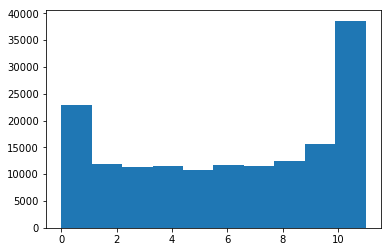

158538


In [6]:
# Voting Classifier After test set scaling and parameter configuring
plt.hist(y_pred)
plt.show()
print(len(y_pred))

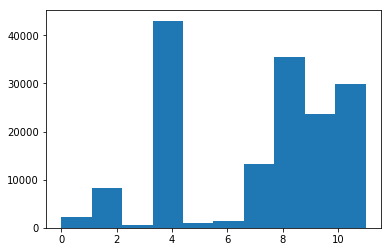

158538


In [10]:
# Gradient Boosting Classifier
plt.hist(y_pred)
plt.show()
print(len(y_pred))

In [28]:
# Make the csv file to submit to the Kaggle Challange
categories = {"yes":0, "no":1, "up":2, "down":3, "left":4, "right":5, "on":6, "off":7, "stop":8, "go":9, "unknown":10, "silence":11}

file = open("submission.csv", "w")
file.write("fname,label\n")
count = 0
for i in range(len(y_pred)):
    for key, value in categories.items():
        if value == y_pred[i]:
            file.write(file_name[i]+","+key)
            count += 1
            break
    if i != len(y_pred)-1:
        file.write("\n")
    else:
         print(i)
file.close()
print(count)

158537
158538


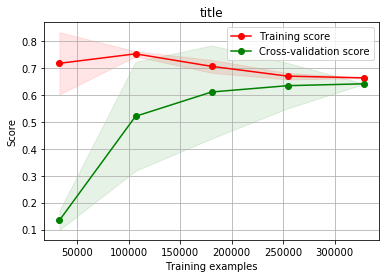

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(gb_clf, "title", X_train, y_train)
plt.show()

In [17]:
# Early stopping try (not enough computational power)
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

# Extra Trees Classifier
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(50):
    gb_clf2.fit(X_train, y_train) # continues where it left off
    y_val_predict = gb_clf2.predict(X_train)
    val_error = mean_squared_error(y_val_predict, y_train)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(et_clf)
    
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

KeyboardInterrupt: 